## 1. Importacion de librerias

In [404]:
# Instalación de librerias
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

import re, unicodedata, string
import contractions
from nltk import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, get_scorer_names, f1_score, make_scorer, classification_report
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. Carga de datos

In [430]:
scopusData = pd.read_csv('data/scopusArticles.csv', sep=',', encoding = 'utf-8')
scopusData.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Lichtenberg G.; Pangalos G.,"Lichtenberg, Gerwald (23978244400); Pangalos, ...",23978244400; 57217836266,Constructive Alignment by Portfolio Exams for ...,2022,IFAC-PapersOnLine,55,17,NaN,194,...,NaN,NaN,NaN,English,IFAC-PapersOnLine,Conference paper,Final,All Open Access; Bronze Open Access,Scopus,2-s2.0-85142285954
1,Bokrantz J.; Subramaniyan M.; Skoogh A.,"Bokrantz, Jon (56786404500); Subramaniyan, Muk...",56786404500; 57191544364; 24588061100,Realising the promises of artificial intellige...,2023,Production Planning and Control,NaN,NaN,NaN,NaN,...,NaN,PPCOE,NaN,English,Prod Plann Control,Article,Article in press,All Open Access; Green Open Access; Hybrid Gol...,Scopus,2-s2.0-85165183489
2,Yokota T.; Pagkalinawan H.,"Yokota, Toshiyuki (57962746500); Pagkalinawan,...",57962746500; 57194039166,Application of Geographic Information Systems ...,2022,Transportation Research Record,2676,11,NaN,171,...,NaN,TRRED,NaN,English,Transp Res Rec,Book chapter,Final,NaN,Scopus,2-s2.0-85141811114
3,Al Janabi M.A.M.,"Al Janabi, Mazin A.M. (24463149200)",24463149200,Optimization algorithms and investment portfol...,2022,Journal of Modelling in Management,17,3,NaN,864,...,NaN,NaN,NaN,English,J. Model. Manage.,Article,Final,NaN,Scopus,2-s2.0-85106274228
4,Giuffrè M.; Shung D.L.,"Giuffrè, Mauro (57210704630); Shung, Dennis L....",57210704630; 56447050200,Harnessing the power of synthetic data in heal...,2023,npj Digital Medicine,6,1,186,NaN,...,NaN,NaN,NaN,English,npj Digit. Med.,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85173631012


In [431]:
originalFrameworkData = pd.read_csv('data/verifiedArticles.csv', sep=',', encoding = 'ANSI')
originalFrameworkData.head()

,Title,Link,Abstract,Name,Category,Criteria
0,Managing big data of offshore project lifecycl...,https://www.scopus.com/inward/record.uri?eid=2...,Big Data is popular term in some recent years ...,Capacity management - Capacity planning,Capacity management,Capacity planning
1,Governance arrangements for IT project portfol...,https://www.scopus.com/inward/record.uri?eid=2...,Due to the growing importance of IT-based inno...,Capacity management - Capacity planning,Capacity management,Capacity planning
2,Project Portfolio Selection Considering the Fu...,https://www.scopus.com/inward/record.uri?eid=2...,The water environment restoration project port...,Capacity management - Capacity planning,Capacity management,Capacity planning
3,Study of the project portfolio model and syste...,https://www.scopus.com/inward/record.uri?eid=2...,"At present, for the leap-forward development, ...",Capacity management - Capacity planning,Capacity management,Capacity planning
4,Portfolio management in non-profit organizatio...,https://www.scopus.com/inward/record.uri?eid=2...,The purpose of this research is to develop a m...,Capacity management - Capacity planning,Capacity management,Capacity planning


## 3. Entendimiento de datos

### 3.1 Unicidad

In [432]:
print("Number of initial documents in Scopus dataframe: " + str(scopusData.shape[0]))

Number of initial documents in Scopus dataframe: 2382


In [433]:
print("Number of duplicated documents in Scopus dataframe: " + str(scopusData.duplicated().sum()))

Number of duplicated documents in Scopus dataframe: 659


In [434]:
scopusData = scopusData.drop_duplicates()
print("Number of different documents in Scopus dataframe: " + str(scopusData.shape[0]))

Number of different documents in Scopus dataframe: 1723


In [435]:
print("Number of initial documents on the framework file: " + str(originalFrameworkData.shape[0]))

Number of initial documents on the framework file: 167


In [436]:
print("Number of duplicated documents in Framework dataframe: " + str(originalFrameworkData.duplicated().sum()))

Number of duplicated documents in Framework dataframe: 0


### 3.2 Completitud

In [437]:
scopusData.isnull().sum(axis = 0)

Authors                           172
Author full names                 172
Author(s) ID                      172
Title                               0
Year                                0
Source title                        2
Volume                            563
Issue                            1144
Art. No.                         1351
Page start                        541
Page end                          554
Page count                        445
Cited by                            0
DOI                               420
Link                                0
Affiliations                      207
Authors with affiliations         207
Abstract                            0
Author Keywords                   499
Index Keywords                    642
Molecular Sequence Numbers       1723
Chemicals/CAS                    1721
Tradenames                       1722
Manufacturers                    1723
Funding Details                  1367
Funding Texts                    1387
References  

In [438]:
originalFrameworkData.isnull().sum(axis = 0)

Title       0
Link        1
Abstract    0
Name        0
Category    0
Criteria    0
dtype: int64

### 3.3 Validez y consistencia

In [439]:
scopusData.dtypes

Authors                           object
Author full names                 object
Author(s) ID                      object
Title                             object
Year                               int64
Source title                      object
Volume                            object
Issue                             object
Art. No.                          object
Page start                        object
Page end                          object
Page count                       float64
Cited by                           int64
DOI                               object
Link                              object
Affiliations                      object
Authors with affiliations         object
Abstract                          object
Author Keywords                   object
Index Keywords                    object
Molecular Sequence Numbers       float64
Chemicals/CAS                     object
Tradenames                        object
Manufacturers                    float64
Funding Details 

In [440]:
originalFrameworkData.dtypes

Title       object
Link        object
Abstract    object
Name        object
Category    object
Criteria    object
dtype: object

In [441]:
originalFrameworkData["Criteria"].unique()

array(['Capacity planning', 'Organizational capabilities',
       'Supply and demand optimization', 'Identification of changes',
       'Impact assessment', 'Cost estimations', 'Financial viability',
       'Portfolio budget', 'Alignment with organizational governance',
       'Roles', 'Capabilities and performance',
       'Financial monitoring and control',
       'Metrics for monitoring project portfolio',
       'Monitoring of portfolio risks', 'Value reporting and analysis',
       'Risk analysis', 'Risk identification', 'Risk response',
       'Communication management', 'Stakeholder engagement',
       'Stakeholder identification',
       'Alignment with strategy and objectives',
       'Portfolio optimization or balance', 'Prioritization', 'Selection',
       'Criteria for setting value objectives', 'Maximizing value',
       'Monitoring and measuring value'], dtype=object)

<Axes: >

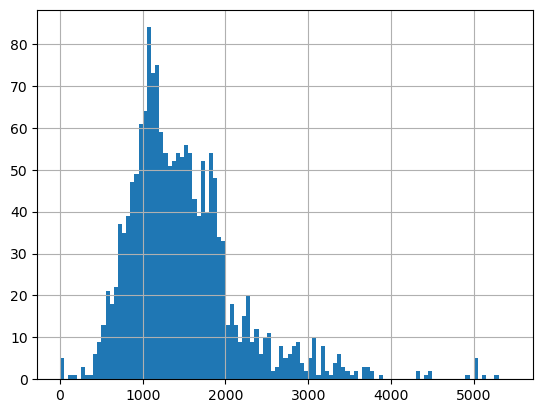

In [442]:
lensScopus = scopusData['Abstract'].str.len()
lensScopus.hist(bins = np.arange(0,5500,50))

<Axes: >

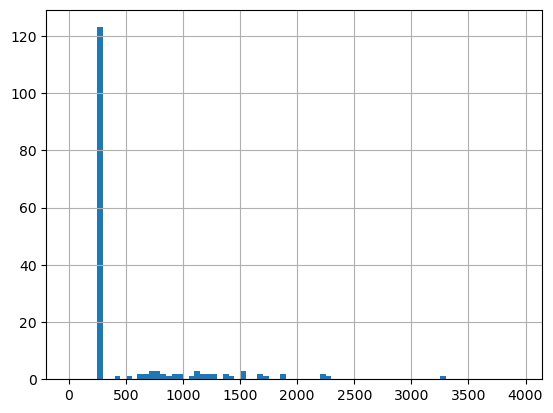

In [443]:
lensFramework = originalFrameworkData['Abstract'].str.len()
lensFramework.hist(bins = np.arange(0,4000,50))

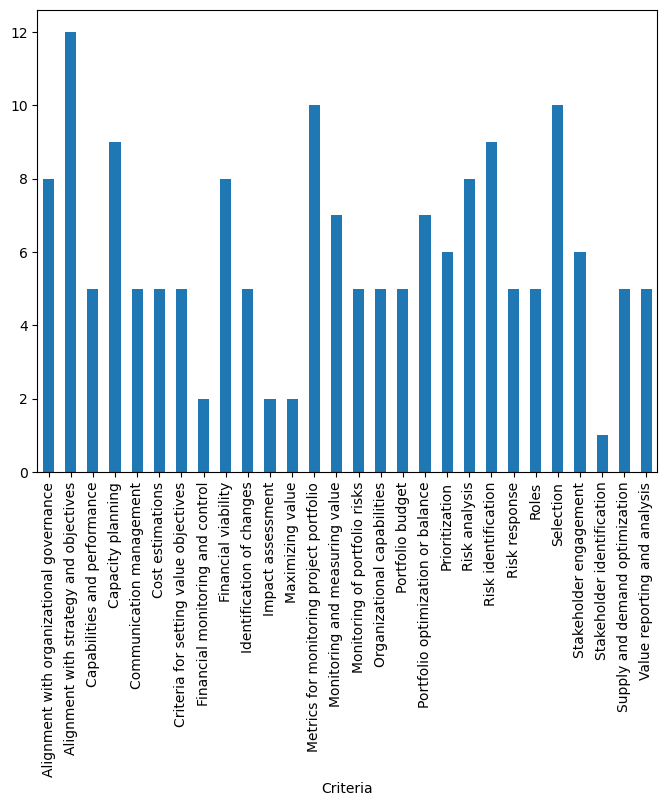

In [444]:
fig = plt.figure(figsize=(8,6))
originalFrameworkData.groupby('Criteria').Abstract.count().plot.bar(ylim=0)
plt.show()

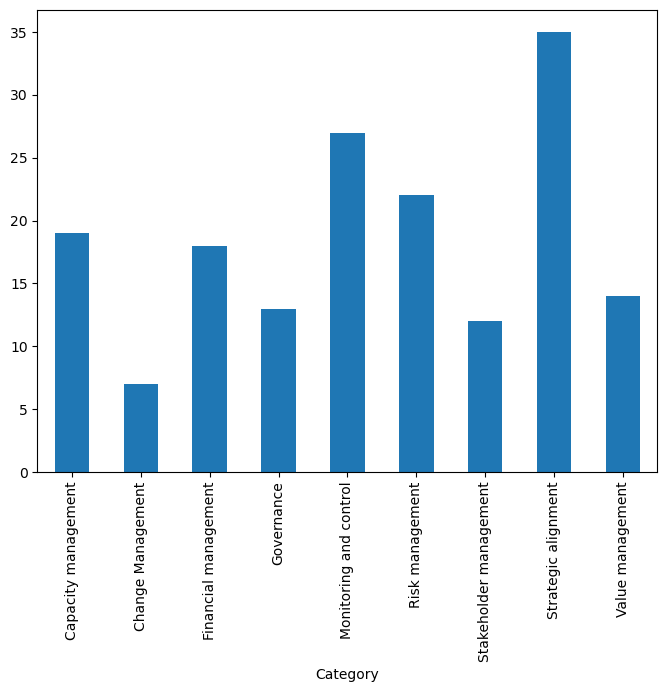

In [445]:
fig = plt.figure(figsize=(8,6))
originalFrameworkData.groupby('Category').Abstract.count().plot.bar(ylim=0)
plt.show()

## 4. Preparación de datos

### 4.1. Organización de datos iniciales

In [446]:
modifiedScopusData = scopusData.copy()
modifiedScopusData = modifiedScopusData[["Title", "Abstract", "Author Keywords", "Index Keywords"]]
modifiedScopusData.head()

,Title,Abstract,Author Keywords,Index Keywords
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...,competency graphs; Constructive alignment; exa...,Advanced control; Competency graph; Constructi...
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...,Artificial intelligence; CRISP-DM; machine lea...,Cost engineering; Economic and social effects;...
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...,data and data science; economic impacts; geogr...,COVID-19; Data visualization; Economic analysi...
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...,Analytics; Artificial intelligence; Business a...,NaN
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...,NaN,Data privacy; Decision making; Financial data ...


In [447]:
modifiedScopusData['Author Keywords'] = modifiedScopusData['Author Keywords'].fillna("")
modifiedScopusData['Index Keywords'] = modifiedScopusData['Index Keywords'].fillna("")
modifiedScopusData['Abstract'] = modifiedScopusData['Abstract'] + " " + modifiedScopusData['Title'] + " " + modifiedScopusData['Author Keywords'] + " " +  modifiedScopusData['Index Keywords']
modifiedScopusData.head()

,Title,Abstract,Author Keywords,Index Keywords
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...,competency graphs; Constructive alignment; exa...,Advanced control; Competency graph; Constructi...
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...,Artificial intelligence; CRISP-DM; machine lea...,Cost engineering; Economic and social effects;...
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...,data and data science; economic impacts; geogr...,COVID-19; Data visualization; Economic analysi...
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...,Analytics; Artificial intelligence; Business a...,
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...,,Data privacy; Decision making; Financial data ...


<Axes: >

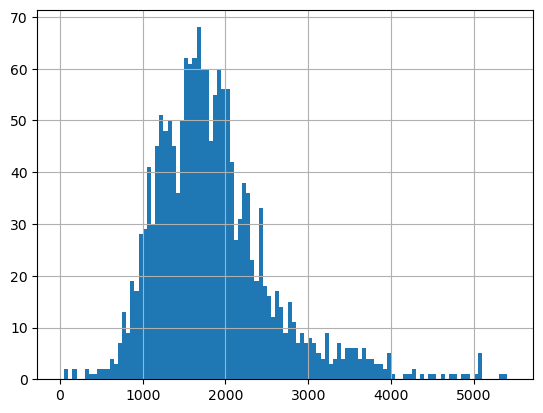

In [448]:
lensScopus = modifiedScopusData['Abstract'].str.len()
lensScopus.hist(bins = np.arange(0,5500,50))

In [449]:
modifiedScopusData = modifiedScopusData.drop(columns = ['Index Keywords', 'Author Keywords'])
modifiedScopusData.head()

,Title,Abstract
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...


In [450]:
modifiedFrameworkData = originalFrameworkData.copy()
modifiedFrameworkData = modifiedFrameworkData[["Title", "Abstract", "Category", "Criteria"]]
modifiedFrameworkData['Abstract'] = modifiedFrameworkData['Abstract'] + " " + modifiedFrameworkData['Title']
modifiedFrameworkData.head()

,Title,Abstract,Category,Criteria
0,Managing big data of offshore project lifecycl...,Big Data is popular term in some recent years ...,Capacity management,Capacity planning
1,Governance arrangements for IT project portfol...,Due to the growing importance of IT-based inno...,Capacity management,Capacity planning
2,Project Portfolio Selection Considering the Fu...,The water environment restoration project port...,Capacity management,Capacity planning
3,Study of the project portfolio model and syste...,"At present, for the leap-forward development, ...",Capacity management,Capacity planning
4,Portfolio management in non-profit organizatio...,The purpose of this research is to develop a m...,Capacity management,Capacity planning


<Axes: >

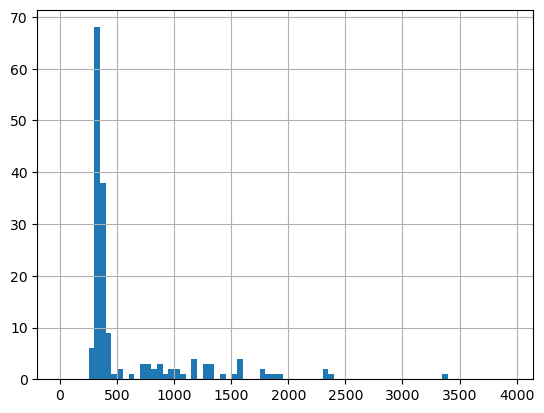

In [451]:
lensFramework = modifiedFrameworkData['Abstract'].str.len()
lensFramework.hist(bins = np.arange(0,4000,50))

### 4.2. Limpieza de datos

In [354]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def remove_punctuation_and_numbers(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        word = word.strip()  
        word = re.compile('<.*?>').sub('', word) 
        word = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', word)  
        word = re.sub('\s+', ' ', word)  
        word = re.sub(r'\[[0-9]*\]',' ', word) 
        word = re.sub(r'[^\w\s]', '', str(word).lower().strip())
        word = re.sub(r'\d',' ', word) 
        word = re.sub(r'\s+',' ', word) 
        if word != "":
            new_words.append(word)
    return new_words
        
    
def preprocessing(words):
    words = to_lowercase(words)
    words = remove_punctuation_and_numbers(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [355]:
tokenizedFrameworkData = modifiedFrameworkData.copy()
tokenizedFrameworkData.head()

,Title,Abstract,Category,Criteria
0,Managing big data of offshore project lifecycl...,Big Data is popular term in some recent years ...,Capacity management,Capacity planning
1,Governance arrangements for IT project portfol...,Due to the growing importance of IT-based inno...,Capacity management,Capacity planning
2,Project Portfolio Selection Considering the Fu...,The water environment restoration project port...,Capacity management,Capacity planning
3,Study of the project portfolio model and syste...,"At present, for the leap-forward development, ...",Capacity management,Capacity planning
4,Portfolio management in non-profit organizatio...,The purpose of this research is to develop a m...,Capacity management,Capacity planning


In [356]:
tokenizedScopusData = modifiedScopusData.copy()
tokenizedScopusData.head()

,Title,Abstract
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...


In [357]:
stop_words = stopwords.words('english')

In [358]:
tokenizedFrameworkData["Abstract"] = tokenizedFrameworkData["Abstract"].apply(contractions.fix)
tokenizedFrameworkData['Words'] = tokenizedFrameworkData['Abstract'].apply(word_tokenize).apply(preprocessing)
tokenizedFrameworkData.head()

,Title,Abstract,Category,Criteria,Words
0,Managing big data of offshore project lifecycl...,Big Data is popular term in some recent years ...,Capacity management,Capacity planning,"[big, data, popular, term, recent, years, beco..."
1,Governance arrangements for IT project portfol...,Due to the growing importance of IT-based inno...,Capacity management,Capacity planning,"[due, growing, importance, it based, innovatio..."
2,Project Portfolio Selection Considering the Fu...,The water environment restoration project port...,Capacity management,Capacity planning,"[water, environment, restoration, project, por..."
3,Study of the project portfolio model and syste...,"At present, for the leap-forward development, ...",Capacity management,Capacity planning,"[present, leap forward, development, aerospace..."
4,Portfolio management in non-profit organizatio...,The purpose of this research is to develop a m...,Capacity management,Capacity planning,"[purpose, research, develop, method, support, ..."


In [359]:
tokenizedScopusData["Abstract"] = tokenizedScopusData["Abstract"].apply(contractions.fix)
tokenizedScopusData['Words'] = tokenizedScopusData['Abstract'].apply(word_tokenize).apply(preprocessing)
tokenizedScopusData.head()

,Title,Abstract,Words
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...,"[paper, shows, useful, paradigm, constructive,..."
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...,"[support, manufacturing, firms, realising, val..."
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...,"[new, technologies, global, datasets, enable, ..."
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...,"[purpose, paper, aims, examine, commodity, por..."
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...,"[data driven, decision making, modern, healthc..."


### 4.3. Lematizacion

In [360]:
lemmatizer = WordNetLemmatizer()

In [361]:
def lemmatize_verbs(words):
    new_words = []
    for word in words:
        new_word = lemmatizer.lemmatize(word)
        new_words.append(new_word)
    return new_words

In [362]:
tokenizedFrameworkData['Words'] = tokenizedFrameworkData['Words'].apply(lemmatize_verbs)
tokenizedFrameworkData.head()

,Title,Abstract,Category,Criteria,Words
0,Managing big data of offshore project lifecycl...,Big Data is popular term in some recent years ...,Capacity management,Capacity planning,"[big, data, popular, term, recent, year, becom..."
1,Governance arrangements for IT project portfol...,Due to the growing importance of IT-based inno...,Capacity management,Capacity planning,"[due, growing, importance, it based, innovatio..."
2,Project Portfolio Selection Considering the Fu...,The water environment restoration project port...,Capacity management,Capacity planning,"[water, environment, restoration, project, por..."
3,Study of the project portfolio model and syste...,"At present, for the leap-forward development, ...",Capacity management,Capacity planning,"[present, leap forward, development, aerospace..."
4,Portfolio management in non-profit organizatio...,The purpose of this research is to develop a m...,Capacity management,Capacity planning,"[purpose, research, develop, method, support, ..."


In [363]:
tokenizedFrameworkData['Words'] = tokenizedFrameworkData['Words'].apply(lambda x: ' '.join(map(str, x)))
tokenizedFrameworkData.head()

,Title,Abstract,Category,Criteria,Words
0,Managing big data of offshore project lifecycl...,Big Data is popular term in some recent years ...,Capacity management,Capacity planning,big data popular term recent year become lever...
1,Governance arrangements for IT project portfol...,Due to the growing importance of IT-based inno...,Capacity management,Capacity planning,due growing importance it based innovation con...
2,Project Portfolio Selection Considering the Fu...,The water environment restoration project port...,Capacity management,Capacity planning,water environment restoration project portfoli...
3,Study of the project portfolio model and syste...,"At present, for the leap-forward development, ...",Capacity management,Capacity planning,present leap forward development aerospace eng...
4,Portfolio management in non-profit organizatio...,The purpose of this research is to develop a m...,Capacity management,Capacity planning,purpose research develop method support govern...


In [364]:
tokenizedFrameworkData['category_id'] = tokenizedFrameworkData['Category'].factorize()[0]
category_id_df = tokenizedFrameworkData[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
tokenizedFrameworkData.head()

,Title,Abstract,Category,Criteria,Words,category_id
0,Managing big data of offshore project lifecycl...,Big Data is popular term in some recent years ...,Capacity management,Capacity planning,big data popular term recent year become lever...,0
1,Governance arrangements for IT project portfol...,Due to the growing importance of IT-based inno...,Capacity management,Capacity planning,due growing importance it based innovation con...,0
2,Project Portfolio Selection Considering the Fu...,The water environment restoration project port...,Capacity management,Capacity planning,water environment restoration project portfoli...,0
3,Study of the project portfolio model and syste...,"At present, for the leap-forward development, ...",Capacity management,Capacity planning,present leap forward development aerospace eng...,0
4,Portfolio management in non-profit organizatio...,The purpose of this research is to develop a m...,Capacity management,Capacity planning,purpose research develop method support govern...,0


In [365]:
tokenizedScopusData['Words'] = tokenizedScopusData['Words'].apply(lemmatize_verbs)
tokenizedScopusData.head()

,Title,Abstract,Words
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...,"[paper, show, useful, paradigm, constructive, ..."
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...,"[support, manufacturing, firm, realising, valu..."
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...,"[new, technology, global, datasets, enable, tr..."
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...,"[purpose, paper, aim, examine, commodity, port..."
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...,"[data driven, decision making, modern, healthc..."


In [366]:
tokenizedScopusData['Words'] = tokenizedScopusData['Words'].apply(lambda x: ' '.join(map(str, x)))
tokenizedScopusData.head()

,Title,Abstract,Words
0,Constructive Alignment by Portfolio Exams for ...,The paper shows how the useful paradigm of con...,paper show useful paradigm constructive alignm...
1,Realising the promises of artificial intellige...,To support manufacturing firms in realising th...,support manufacturing firm realising value art...
2,Application of Geographic Information Systems ...,New technologies and global datasets enable tr...,new technology global datasets enable transpor...
3,Optimization algorithms and investment portfol...,Purpose: This paper aims to examine from commo...,purpose paper aim examine commodity portfolio ...
4,Harnessing the power of synthetic data in heal...,Data-driven decision-making in modern healthca...,data driven decision making modern healthcare ...


In [367]:
tokenizedScopusData = tokenizedScopusData.drop(columns = ['Abstract'])
tokenizedScopusData.head()

,Title,Words
0,Constructive Alignment by Portfolio Exams for ...,paper show useful paradigm constructive alignm...
1,Realising the promises of artificial intellige...,support manufacturing firm realising value art...
2,Application of Geographic Information Systems ...,new technology global datasets enable transpor...
3,Optimization algorithms and investment portfol...,purpose paper aim examine commodity portfolio ...
4,Harnessing the power of synthetic data in heal...,data driven decision making modern healthcare ...


### 4.4 Análisis y eliminación de palabras problematicas

In [368]:
frameworkWords = tokenizedFrameworkData['Words'].to_string().split()
frameworkWords = [word for word in frameworkWords if len(word) <= 3 and word.isalpha()]
print(frameworkWords)

['big', 'due', 'it', 'top', 'dr', 'r', 'bp', 'lng', 'pay', 'new', 'pay', 'new', 'eu', 'due', 'aim', 'gas', 'ppm', 'use', 'era', 'big', 'erp', 'ict', 'bad', 'aim', 'big', 'ea', 'one', 'way', 'net', 'aim', 'use', 'use', 'new', 'way', 'r', 'oil', 'aim', 'oil', 'due', 'gas', 'r', 'end', 'six', 'one', 'ai', 'due', 'r', 'pp', 'iot', 'pre', 'ppm', 'imi', 'big', 'key', 'one', 'key', 'ba', 'way', 'ba', 'big', 'and', 'big', 'one', 'ppm', 'one', 'ppm', 'new', 'bi', 'big']


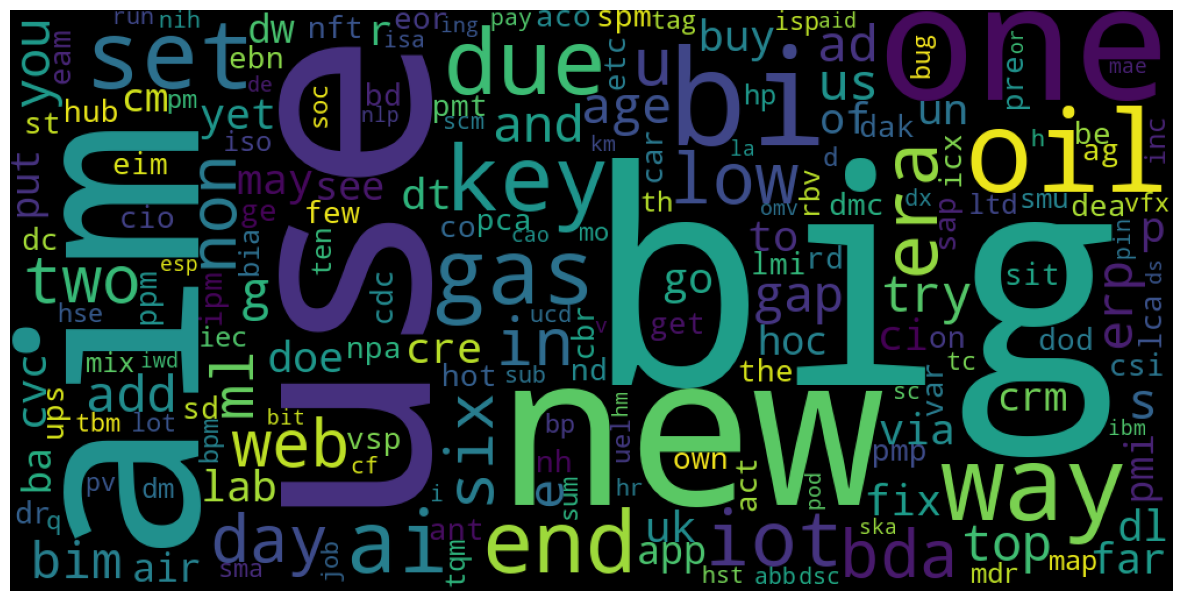

In [369]:
word_could_dict=Counter(scopusWords)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [370]:
vectorizerFr = TfidfVectorizer()
vecsFr = vectorizerFr.fit_transform(tokenizedFrameworkData['Words'])
featureNamesFr = vectorizerFr.get_feature_names_out()
denseFr = vecsFr.todense()
lstFr = denseFr.tolist()
dfIdfScoreFr = pd.DataFrame(lstFr, columns=featureNamesFr)
dfIdfScoreFr.head()

,ability,able,absolutely,abstract,academic,academy,accelerate,acceptable,acceptance,access,...,world,worldwide,would,wrestling,writing,wuhan,year,yet,yield,zone
0,0.0,0.0,0.206064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.15828,0.0,0.0,0.0,0.0,0.0,0.162064,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


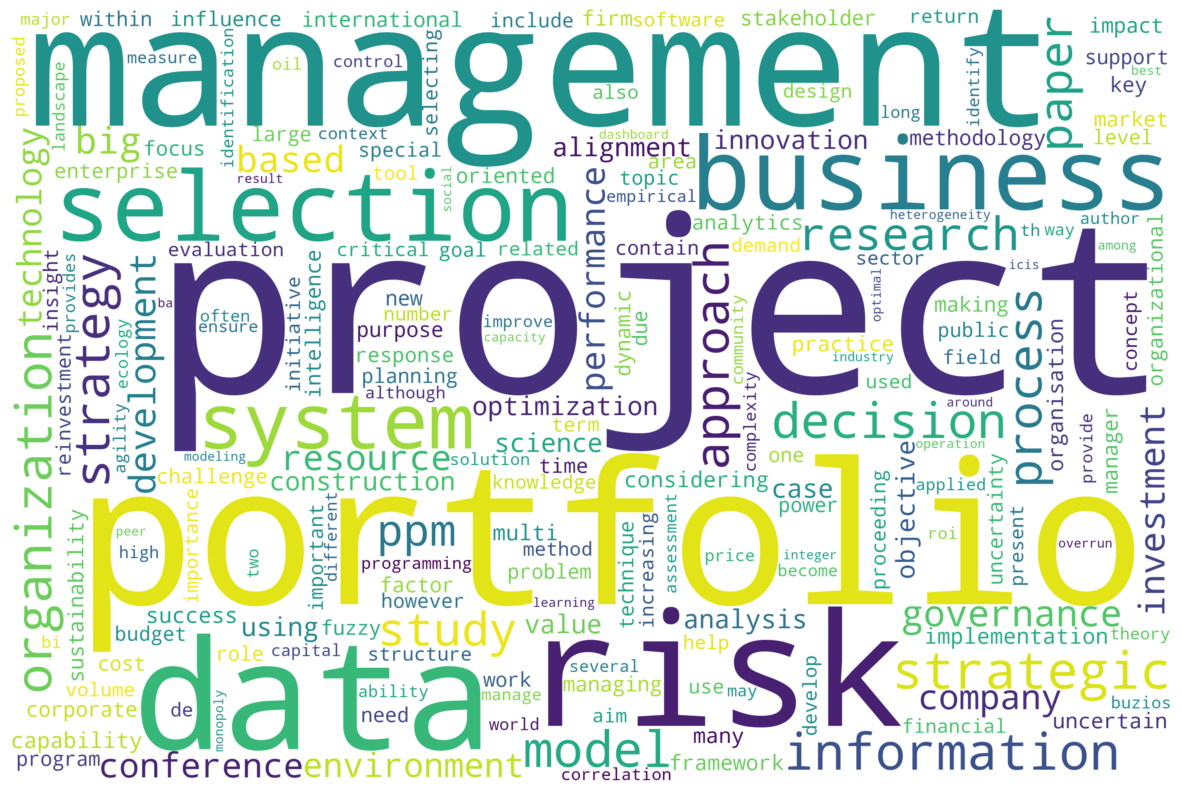

In [371]:
tfIdfCounterFr = dfIdfScoreFr.T.sum(axis=1)
wordcloudFr = WordCloud(width = 3000, height = 2000,background_color='white')
wordcloudFr.generate_from_frequencies(tfIdfCounterFr)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloudFr, interpolation='bilinear')
plt.axis("off")
plt.show()

In [372]:
vectorizerSc = TfidfVectorizer()
vecsSc = vectorizerSc.fit_transform(tokenizedScopusData['Words'])
featureNamesSc = vectorizerSc.get_feature_names_out()
denseSc = vecsSc.todense()
lstSc = denseSc.tolist()
dfIdfScoreSc = pd.DataFrame(lstSc, columns=featureNamesSc)
dfIdfScoreSc.head()

,aaa,aaai,aaba,aal,aapl,aashe,aashto,aashtow,aat,aats,...,zimmer,zinc,zno,zoho,zoltners,zone,zorg,zulia,zumbi,zur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


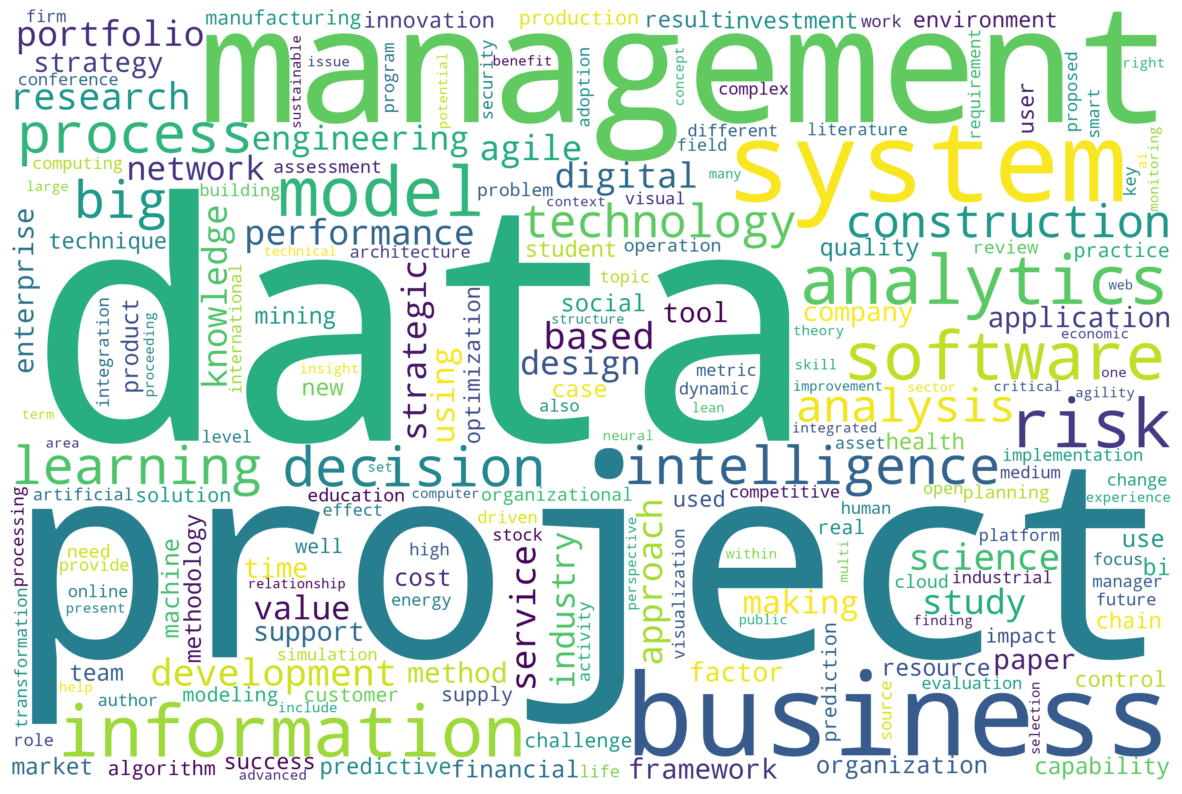

In [373]:
tfIdfCounterSc = dfIdfScoreSc.T.sum(axis=1)
wordcloudSc = WordCloud(width = 3000, height = 2000,background_color='white')
wordcloudSc.generate_from_frequencies(tfIdfCounterSc)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloudSc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [374]:
tokenizedScopusData['Words'] = tokenizedScopusData['Words'].replace(value='', regex=r'\b[a-z]{1,2}\b')
tokenizedScopusData['Words'].head()

0    paper show useful paradigm constructive alignm...
1    support manufacturing firm realising value art...
2    new technology global datasets enable transpor...
3    purpose paper aim examine commodity portfolio ...
4    data driven decision making modern healthcare ...
Name: Words, dtype: object

In [375]:
tokenizedFrameworkData['Words'] = tokenizedFrameworkData['Words'].replace(value='', regex=r'\b[a-z]{1,2}\b')
tokenizedFrameworkData['Words'].head()

0    big data popular term recent year become lever...
1    due growing importance  based innovation conte...
2    water environment restoration project portfoli...
3    present leap forward development aerospace eng...
4    purpose research develop method support govern...
Name: Words, dtype: object

In [378]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, max_df=0.25, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(tokenizedFrameworkData.Words).toarray()
labels = tokenizedFrameworkData.category_id
features.shape

(167, 1701)

In [379]:
N = 8
for Criterion, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Criterion))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Capacity management':
  . Most correlated unigrams:
. bank
. constraint
. implemented
. capacity
. plant
. journey
. search
. operation
  . Most correlated bigrams:
. portfolio governance
. decision tree
. purpose research
. analysis project
. dynamic capability
. ppm capability
. critical capability
. develop method
# 'Change Management':
  . Most correlated unigrams:
. rise
. logistics
. run
. constr
. mainly
. attractiveness
. site
. economy
  . Most correlated bigrams:
. pay increasing
. site construction
. site site
. framework site
. urbanisation long
. rapid global
. attractiveness city
. attention new
# 'Financial management':
  . Most correlated unigrams:
. budget
. software
. sharing
. energy
. mature
. consequently
. human
. equipment
  . Most correlated bigrams:
. reinvestment strategy
. new product
. success project
. making process
. software development
. organization need
. development organization
. human resource
# 'Governance':
  . Most correlated unigrams:
. anal

In [380]:
frameworkStopwords = ["project", "area", "given", "level", "buzios", "world", "contain", "best", "within", "field", "paper", "around", "public", "ability", "making"
                      "develop", "purpose", "using", "nature", "present", "author", "concept", "number", "proposed", "result", "contain", "different", "several",
                      "management", "portfolio", "focus", "help", "however", "term", "problem", "time", "many", "system", "case", "process", "make", "set", "use", 
                      "give", "lean", "open", "well", "key", "oil", "also", "new", "include", "single", "face", "rapid", "long", "built", "follow", "consequently",
                      "today", "achieve", "realize", "developed", "public", "constantly", "one", "identify", "give", "need", "several", "often", "show", "become",
                      "although", "aim", "manage", "non", "site", "pre", "vital", "responibility", "applicable"]
tokenizedFrameworkData["Words"] = tokenizedFrameworkData["Words"].replace('|'.join(frameworkStopwords), '', regex=True)
tokenizedFrameworkData.head()

,Title,Abstract,Category,Criteria,Words,category_id
0,Managing big data of offshore project lifecycl...,Big Data is popular term in some recent years ...,Capacity management,Capacity planning,big data popular recent year leverage busine...,0
1,Governance arrangements for IT project portfol...,Due to the growing importance of IT-based inno...,Capacity management,Capacity planning,due growing importance based innovation conte...,0
2,Project Portfolio Selection Considering the Fu...,The water environment restoration project port...,Capacity management,Capacity planning,water environment restoration werp selection...,0
3,Study of the project portfolio model and syste...,"At present, for the leap-forward development, ...",Capacity management,Capacity planning,leap forward development aerospace engineerin...,0
4,Portfolio management in non-profit organizatio...,The purpose of this research is to develop a m...,Capacity management,Capacity planning,research develop method support governing inf...,0


In [381]:
scopusStopwords = ["project", "portfolio", "using", "develop", "approach", "system", "tool", "used", "team", "current", "activity", "structure", "present", "data",
                   "need", "within", "open", "right", "time", "paper", "proceeding", "new", "different", "towards", "case", "topic", "based", "set", "use", "give",
                   "make", "need", "purpose", "manage", "new", "show", "aim"]
tokenizedScopusData["Words"] = tokenizedScopusData["Words"].replace('|'.join(scopusStopwords), '', regex=True)
tokenizedScopusData.head()

,Title,Words
0,Constructive Alignment by Portfolio Exams for ...,ful paradigm constructive alignment applied ...
1,Realising the promises of artificial intellige...,support manufacturing firm realising value art...
2,Application of Geographic Information Systems ...,technology global s enable transport assesse...
3,Optimization algorithms and investment portfol...,examine commodity r perspective performanc...
4,Harnessing the power of synthetic data in heal...,driven decision making modern healthcare unde...


### 4.5 Exportacion a formato CSV

In [382]:
tokenizedFrameworkData.to_csv('data/transformedFrameworkData.csv')

In [383]:
tokenizedScopusData.to_csv('data/transformedInputData.csv')

## 5. Modelo predictivo de clasificación

### 5.1. Evaluación de hiperparametros para cada algoritmo

In [395]:
X = tokenizedFrameworkData['Words']
y = tokenizedFrameworkData['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

models = [
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(),
]

for model in models:

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('clf', OneVsRestClassifier(model)),
    ])
    parameters = {
        'tfidf__max_df': (0.2, 0.4, 0.6, 0.8),
        'tfidf__min_df': (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]
    }

    grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=4, scoring=make_scorer(f1_score, average= 'micro'))
    grid_search_tune.fit(X_train, y_train)

    print(model.__class__.__name__)
    print(grid_search_tune.best_params_)
    print(grid_search_tune.best_score_)

C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validati

RandomForestClassifier
{'tfidf__max_df': 0.4, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 1)}
0.34347826086956523


C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validati

LinearSVC
{'tfidf__max_df': 0.4, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)}
0.30942028985507253


C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

MultinomialNB
{'tfidf__max_df': 0.2, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)}
0.3264492753623188
LogisticRegression
{'tfidf__max_df': 0.2, 'tfidf__min_df': 9, 'tfidf__ngram_range': (1, 1)}
0.3101449275362319


C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [396]:
tfidfconverter = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 1), encoding='latin-1', min_df=3, max_df=0.4, stop_words=('english'))
features = tfidfconverter.fit_transform(tokenizedFrameworkData.Words).toarray()
labels = tokenizedFrameworkData['Category']
features.shape[1]

532

### 5.2 Evaluación de algoritmos de predicción segun el mejor hiperparametro

C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

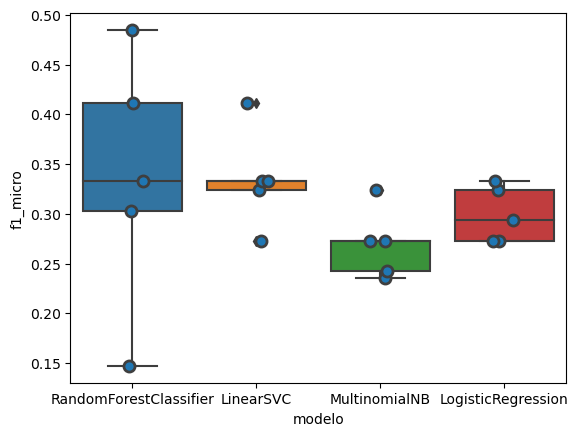

In [399]:
models = [
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='f1_micro', cv=CV, error_score="raise")
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['modelo', 'fold_idx', 'f1_micro'])
sns.boxplot(x='modelo', y='f1_micro', data=cv_df)
sns.stripplot(x='modelo', y='f1_micro', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [400]:
cv_df.groupby('modelo').f1_micro.mean()

modelo
LinearSVC                 0.334938
LogisticRegression        0.299287
MultinomialNB             0.269340
RandomForestClassifier    0.336007
Name: f1_micro, dtype: float64

### 5.3 Evaluación del modelo

Before OverSampling, the shape of train_X: (116, 532)
Before OverSampling, the shape of train_y: (116,) 

After OverSampling, the shape of train_X: (207, 532)
After OverSampling, the shape of train_y: (207,) 



C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

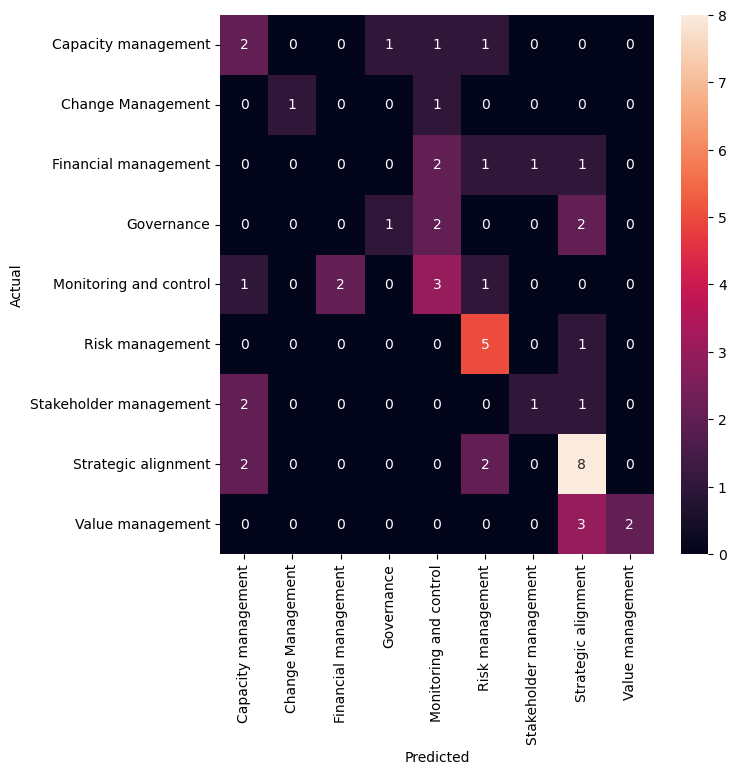

                        precision    recall  f1-score   support

   Capacity management       0.29      0.40      0.33         5
     Change Management       1.00      0.50      0.67         2
  Financial management       0.00      0.00      0.00         5
            Governance       0.50      0.20      0.29         5
Monitoring and control       0.33      0.43      0.38         7
       Risk management       0.50      0.83      0.62         6
Stakeholder management       0.50      0.25      0.33         4
   Strategic alignment       0.50      0.67      0.57        12
      Value management       1.00      0.40      0.57         5

              accuracy                           0.45        51
             macro avg       0.51      0.41      0.42        51
          weighted avg       0.48      0.45      0.43        51



C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\leane\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [403]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
smote = SMOTE(random_state=0, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape)) 
model = OneVsRestClassifier(RandomForestClassifier())
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print(classification_report(y_test,y_pred))